In [1]:
sig_sites <- function(df){
    n <- nrow(df)
    df_subset <- subset(df, P.value < .05/n)
}
options(repr.plot.width = 25, repr.plot.height = 5)
qq.plot <- function(p, dec.ps = 4, alpha = 0.05, p.correct = "Bonferroni", ...) {
  if (!is.numeric(p)) stop("P value vector is not numeric.")
  p <- p[!is.na(p) & p < 1 & p > 0]
  # Create a vector of sorted -log10 p-values (observed data)
  o <- -log10(sort(p, decreasing = FALSE))
  # Generates -log 10 probability points (e-value under uniform dist.)
  # Same number as there are observed values so they can be plotted as a pair (sorted o with p)
  e <- -log10(ppoints(length(p))) 
  if (p.correct == "Bonferroni") {
    sig.p <- which(sort(p, decreasing = FALSE) <= alpha / length(p))
  } else if (p.correct == "Holm") {
    sig.p <- which(p.adjust(sort(p, decreasing = FALSE), method = "holm") <= 0.05)
  }  
  # Calculate (10%?) confidence interval
  # Create two vectors for the UL and LL
  c95 <- rep(0, length(p))
  c05 <- rep(0, length(p)) 
  # Calculate the quantile of probability 0.95 and 0.05
  for (i in 1:length(p)) {
    c95[i] <- qbeta(0.95, i, (length(p) - i + 1)) # Not sure why the shape parameters are what they are
    c05[i] <- qbeta(0.05, i, (length(p) - i + 1))
  }  
  ## Calculate genomic inflation factor
  lambda <- round(qchisq(median(p), df = 1, lower.tail = FALSE) / qchisq(0.5, df = 1), dec.ps)  
  
  # Plot main points
  plot(e, o,
       xlab = "Expected -log10(P-values)",
       ylab = "Observed -log10(P-values)",
       xlim = c(0, max(e)), ylim = c(0, max(o)), ..., cex.lab = 2.5, cex.axis = 2.5, cex.main = 3)
  
  # Plot significant points
  points(e[sig.p], o[sig.p], pch = 16, col = "red")
  
  # Line of slope one (expectation)
  abline(0, 1)
  
  # Plot confidence interval curves
  lines(e, -log10(c95), type = "l", lty = 5)
  lines(e, -log10(c05), type = "l", lty = 5)
  
  # Add lambda to the plot
  text(paste("genomic inflation =", lambda),
       x = 0, y = -log10(min(p)) - 0.2, pos = 4, cex = 3)
}

,CPG.Labels,P.value.random,P.value.fix,het.P.value
,<chr>,<dbl>,<dbl>,<dbl>
1,cg27666123,0.28069643,0.2806964302,0.87402878
2,cg27666046,0.00526645,0.0001505494,0.13002877
3,cg27665985,0.36436518,0.1721954203,0.07239004
4,cg27665925,0.85819151,0.8581915126,0.67404811
5,cg27665860,0.57845246,0.3391414471,0.28145168
6,cg27665829,0.28978315,0.2428311324,0.36982234


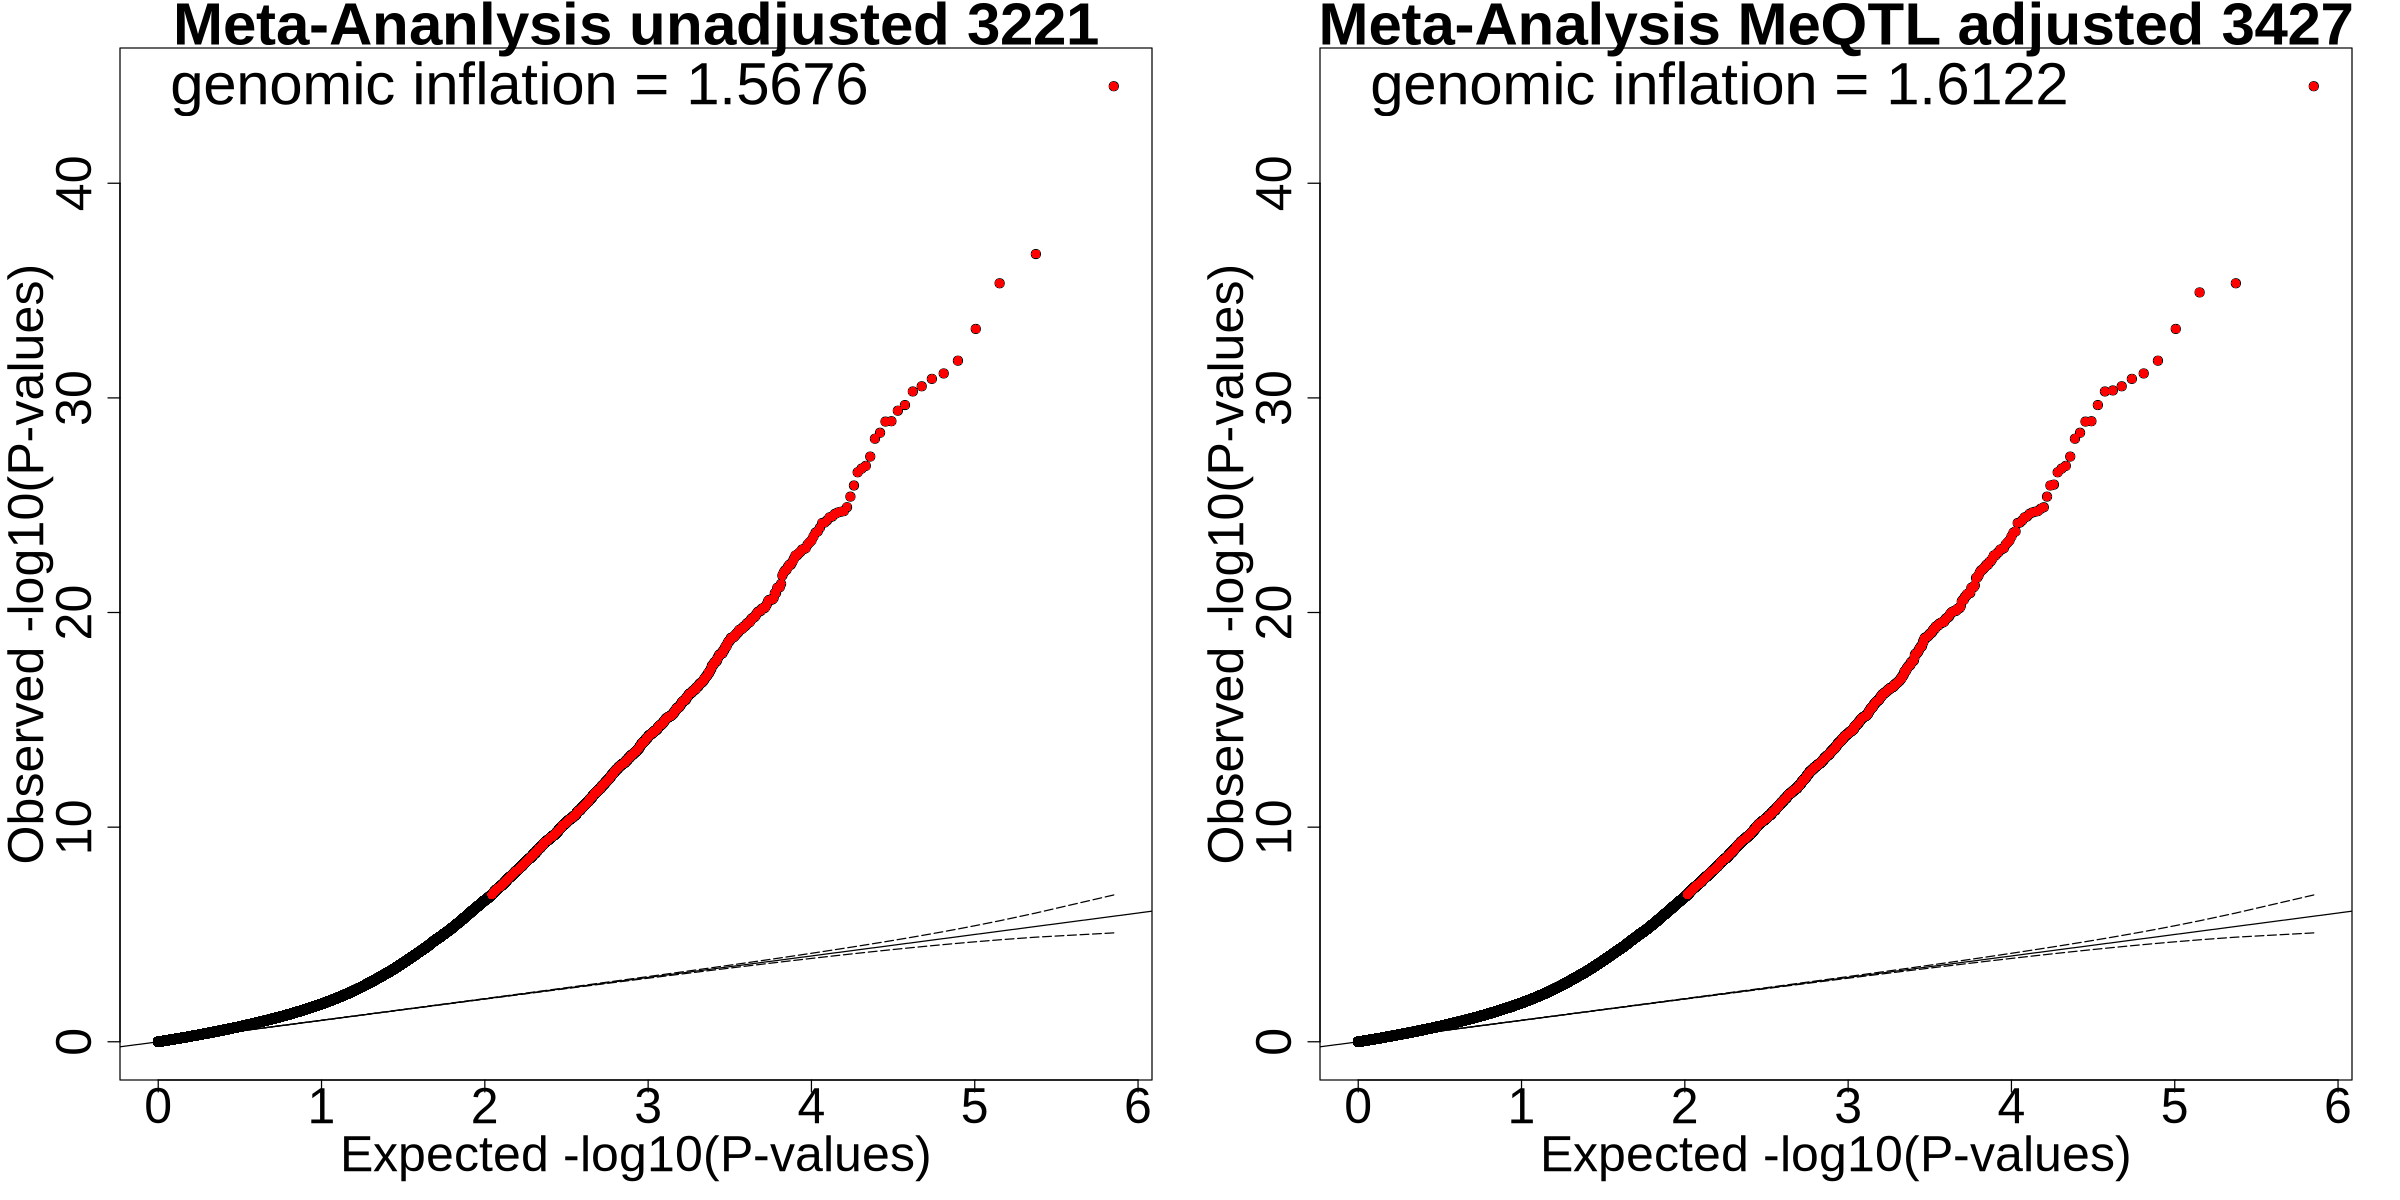

In [2]:
load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/metagen_all3_no_meqtl_regress.RData")
head(meta_gen)
meta_gen$P.value <- meta_gen$P.value.fix
fixed_sig <- subset(meta_gen, P.value.fix < .05/nrow(meta_gen))
par(mfrow = c(1, 2), mar = c(5, 5, 2, 2))

options(repr.plot.width = 20, repr.plot.height = 10)

qq.plot(meta_gen$P.value, main = paste('Meta-Ananlysis unadjusted',  nrow(fixed_sig))) 

load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/metagen_all3_meqtl_regressed.RData")
meta_gen$P.value <- meta_gen$P.value.fix
fixed_sig <- subset(meta_gen, P.value.fix < .05/nrow(meta_gen))

qq.plot(meta_gen$P.value, main = paste('Meta-Analysis MeQTL adjusted',  nrow(fixed_sig))) 


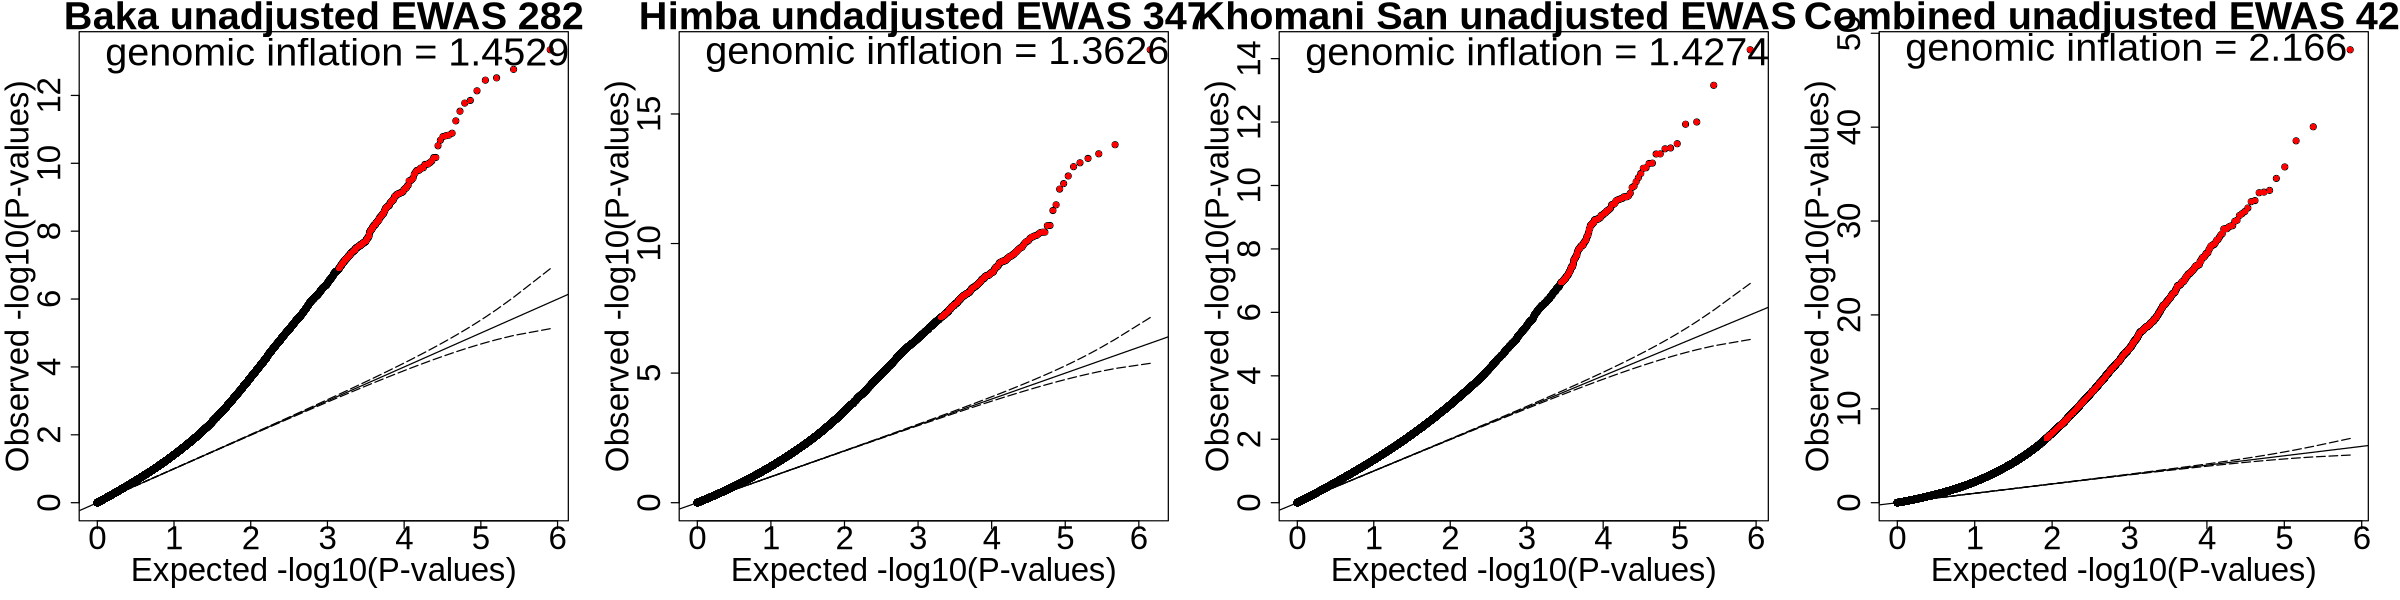

In [3]:
Baka_best_covs <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/Baka_sex_methPC23_Neutro_genoPC12345_no_meqtl_regress.ps", header=FALSE)

KHS_best_covs <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/KHS_sex_batch_PC13_meth_Neutro_genoPCs_no_meqtl_regress.ps", header=FALSE)

Himba_best_covs <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/Himba_sex_cpPCs_Neutro_genoPCs_no_meqtl_regress.ps", header=FALSE)

KHS_best_covs$V1 <- as.character(KHS_best_covs$V1)
Baka_best_covs$V1 <- as.character(Baka_best_covs$V1)
Himba_best_covs$V1 <- as.character(Himba_best_covs$V1)

colnames(Baka_best_covs)<-c("CPG.Labels","V2","P.value")
colnames(KHS_best_covs)<-c("CPG.Labels","V2","P.value")
colnames(Himba_best_covs)<-c("CPG.Labels","V2","P.value")
Himba_sig <- sig_sites(Himba_best_covs)
KHS_sig <- sig_sites(KHS_best_covs)
Baka_sig <- sig_sites(Baka_best_covs)
cat("\n")
options(repr.plot.width = 20, repr.plot.height = 5)

par(mfrow = c(1, 4), mar = c(5, 5, 2, 2))


all_emmax_no_regress <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/all_covs_no_meqtl_regressed.ps", header=FALSE)
colnames(all_emmax_no_regress)<-c("CPG.Labels","V2","P.value")
all_emmax_no_regress$CPG.Labels <- as.character(all_emmax_no_regress$CPG.Labels)
all_sig <- sig_sites(all_emmax_no_regress)

qq.plot(Baka_best_covs$P.value, main = paste('Baka unadjusted EWAS',  nrow(Baka_sig))) 
qq.plot(Himba_best_covs$P.value, main = paste('Himba undadjusted EWAS',  nrow(Himba_sig))) 
qq.plot(KHS_best_covs$P.value, main = paste('\u2021Khomani San unadjusted EWAS',  nrow(KHS_sig))) 
qq.plot(all_emmax_no_regress$P.value, main = paste('Combined unadjusted EWAS',  nrow(all_sig))) 


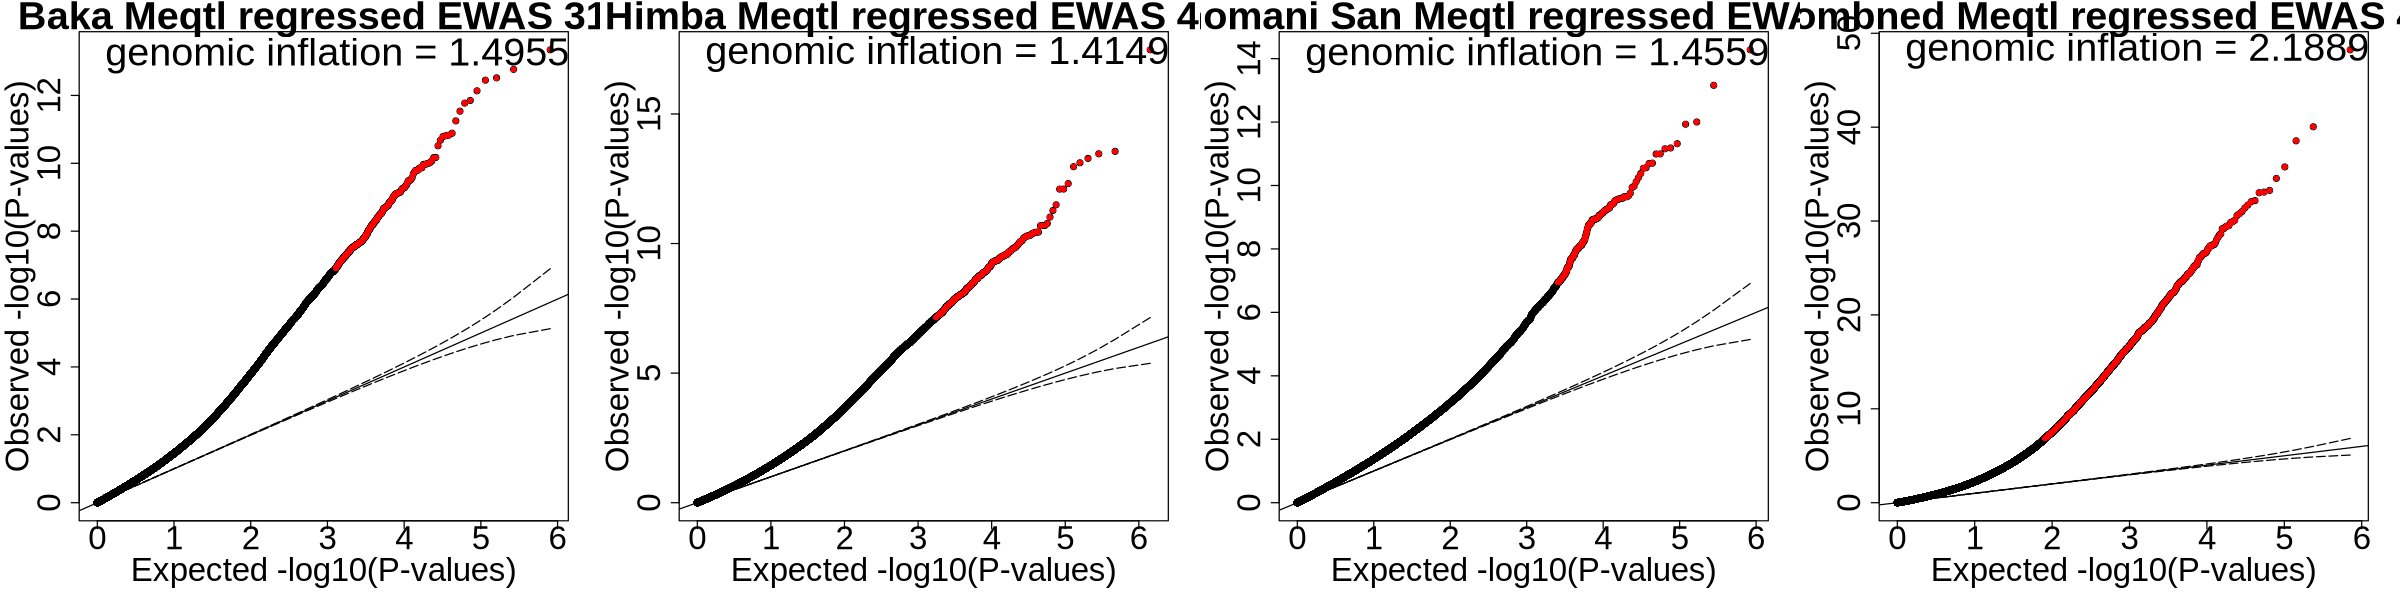

In [4]:
Baka_best_covs_reg <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/Baka_sex_methPC23_Neutro_genoPC12345_meqtl_regressed.ps", header=FALSE)

KHS_best_covs_reg <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/KHS_sex_batch_PC13_meth_Neutro_genoPCs_meqtl_regressed.ps", header=FALSE)

Himba_best_covs_reg <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/Himba_sex_cpPCs_Neutro_genoPCs_meqtl_regressed.ps", header=FALSE)


KHS_best_covs_reg$V1 <- as.character(KHS_best_covs_reg$V1)
Baka_best_covs_reg$V1 <- as.character(Baka_best_covs_reg$V1)
Himba_best_covs_reg$V1 <- as.character(Himba_best_covs_reg$V1)

colnames(Baka_best_covs_reg)<-c("CPG.Labels","V2","P.value")
colnames(KHS_best_covs_reg)<-c("CPG.Labels","V2","P.value")
colnames(Himba_best_covs_reg)<-c("CPG.Labels","V2","P.value")

Himba_best_covs_reg$CPG.Labels <- as.character(Himba_best_covs_reg$CPG.Labels)
KHS_best_covs_reg$CPG.Labels <- as.character(KHS_best_covs_reg$CPG.Labels)
Baka_best_covs_reg$CPG.Labels <- as.character(Baka_best_covs_reg$CPG.Labels)


Himba_sig_reg <- sig_sites(Himba_best_covs_reg)
KHS_sig_reg <- sig_sites(KHS_best_covs_reg)
Baka_sig_reg <- sig_sites(Baka_best_covs_reg)

all_emmax_regress <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/all_covs_meqtl_regressed.ps", header=FALSE)
colnames(all_emmax_regress)<-c("CPG.Labels","V2","P.value")

all_emmax_regress$CPG.Labels <- as.character(all_emmax_regress$CPG.Labels)

all_reg_sig <- sig_sites(all_emmax_regress)


par(mfrow = c(1, 4), mar = c(5, 5, 2, 2))
qq.plot(Baka_best_covs_reg$P.value, main = paste('Baka Meqtl regressed EWAS',  nrow(Baka_sig_reg))) 
qq.plot(Himba_best_covs_reg$P.value, main = paste('Himba Meqtl regressed EWAS',  nrow(Himba_sig_reg))) 
qq.plot(KHS_best_covs_reg$P.value, main = paste('\u2021Khomani San Meqtl regressed EWAS',  nrow(KHS_sig_reg))) 
qq.plot(all_emmax_regress$P.value, main = paste('Combned Meqtl regressed EWAS', nrow(all_reg_sig)))
                                                

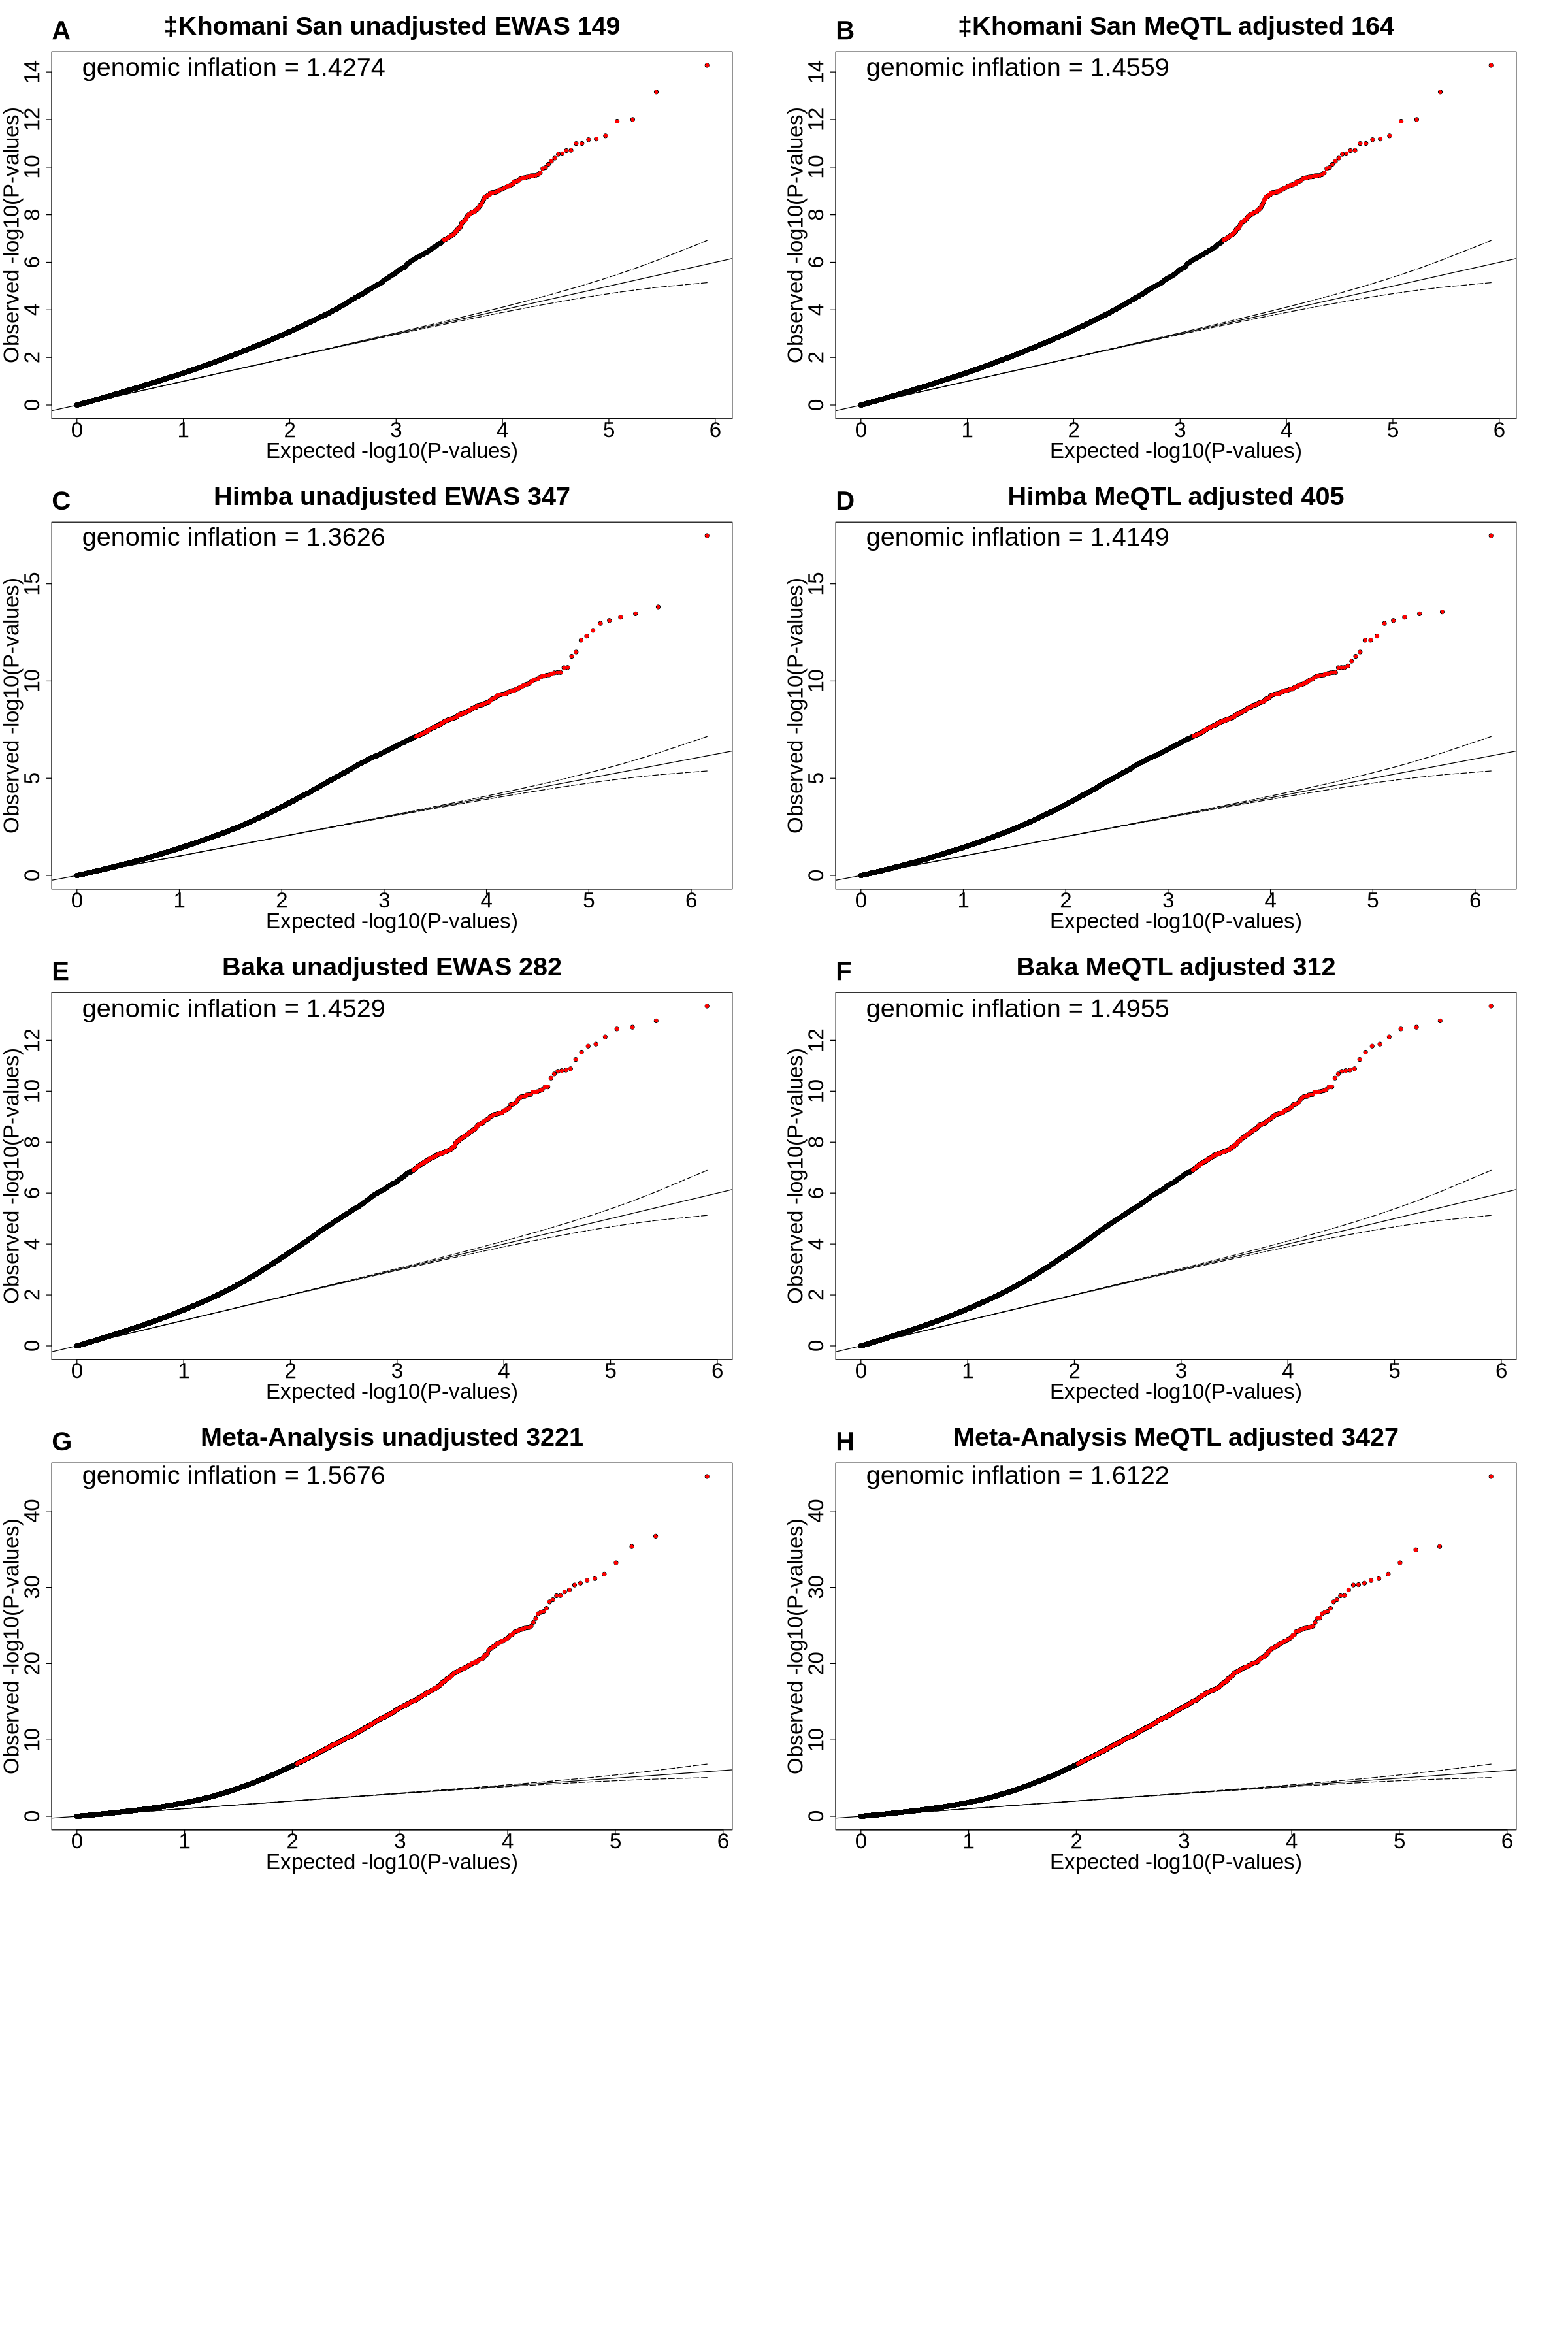

In [6]:
# Set plotting parameters
options(repr.plot.width = 20, repr.plot.height = 30)

# Adjust the margins: bottom, left, top, right
par(mfrow = c(5, 2), mar = c(5, 5, 5, 5))  # Increased right margin from 2 to 5

# Plot A
qq.plot(KHS_best_covs$P.value, main = paste('\u2021Khomani San unadjusted EWAS', nrow(KHS_sig))) 
mtext("A", side = 3, adj = 0, line = 1, cex = 2, font = 2)

# Plot B
qq.plot(KHS_best_covs_reg$P.value, main = paste('\u2021Khomani San MeQTL adjusted', nrow(KHS_sig_reg))) 
mtext("B", side = 3, adj = 0, line = 1, cex = 2, font = 2)
# Plot C
qq.plot(Himba_best_covs$P.value, main = paste('Himba unadjusted EWAS',  nrow(Himba_sig))) 
mtext("C", side=3, adj=0, line=1, cex=2, font=2)

# Plot D
qq.plot(Himba_best_covs_reg$P.value, main = paste('Himba MeQTL adjusted',  nrow(Himba_sig_reg))) 
mtext("D", side=3, adj=0, line=1, cex=2, font=2)

# Plot E
qq.plot(Baka_best_covs$P.value, main = paste('Baka unadjusted EWAS',  nrow(Baka_sig))) 
mtext("E", side=3, adj=0, line=1, cex=2, font=2)

# Plot F
qq.plot(Baka_best_covs_reg$P.value, main = paste('Baka MeQTL adjusted',  nrow(Baka_sig_reg))) 
mtext("F", side=3, adj=0, line=1, cex=2, font=2)

# # Plot G
# qq.plot(all_emmax_no_regress$P.value, main = paste('Combined unadjusted EWAS',  nrow(all_sig))) 
# mtext("G", side=3, adj=0, line=1, cex=2, font=2)

# # Plot H
# qq.plot(all_emmax_regress$P.value, main = paste('Combined MeQTL adjusted', nrow(all_reg_sig)))
# mtext("H", side=3, adj=0, line=1, cex=2, font=2)

# Load and plot Meta-Analysis unadjusted
load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/metagen_all3_no_meqtl_regress.RData")
meta_gen$P.value <- meta_gen$P.value.fix
fixed_sig <- subset(meta_gen, P.value.fix < .05/nrow(meta_gen))
qq.plot(meta_gen$P.value, main = paste('Meta-Analysis unadjusted',  nrow(fixed_sig))) 
mtext("G", side=3, adj=0, line=1, cex=2, font=2)

# Load and plot Meta-Analysis MeQTL adjusted
load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/metagen_all3_meqtl_regressed.RData")
meta_gen$P.value <- meta_gen$P.value.fix
fixed_sig <- subset(meta_gen, P.value.fix < .05/nrow(meta_gen))
qq.plot(meta_gen$P.value, main = paste('Meta-Analysis MeQTL adjusted',  nrow(fixed_sig))) 
mtext("H", side=3, adj=0, line=1, cex=2, font=2)

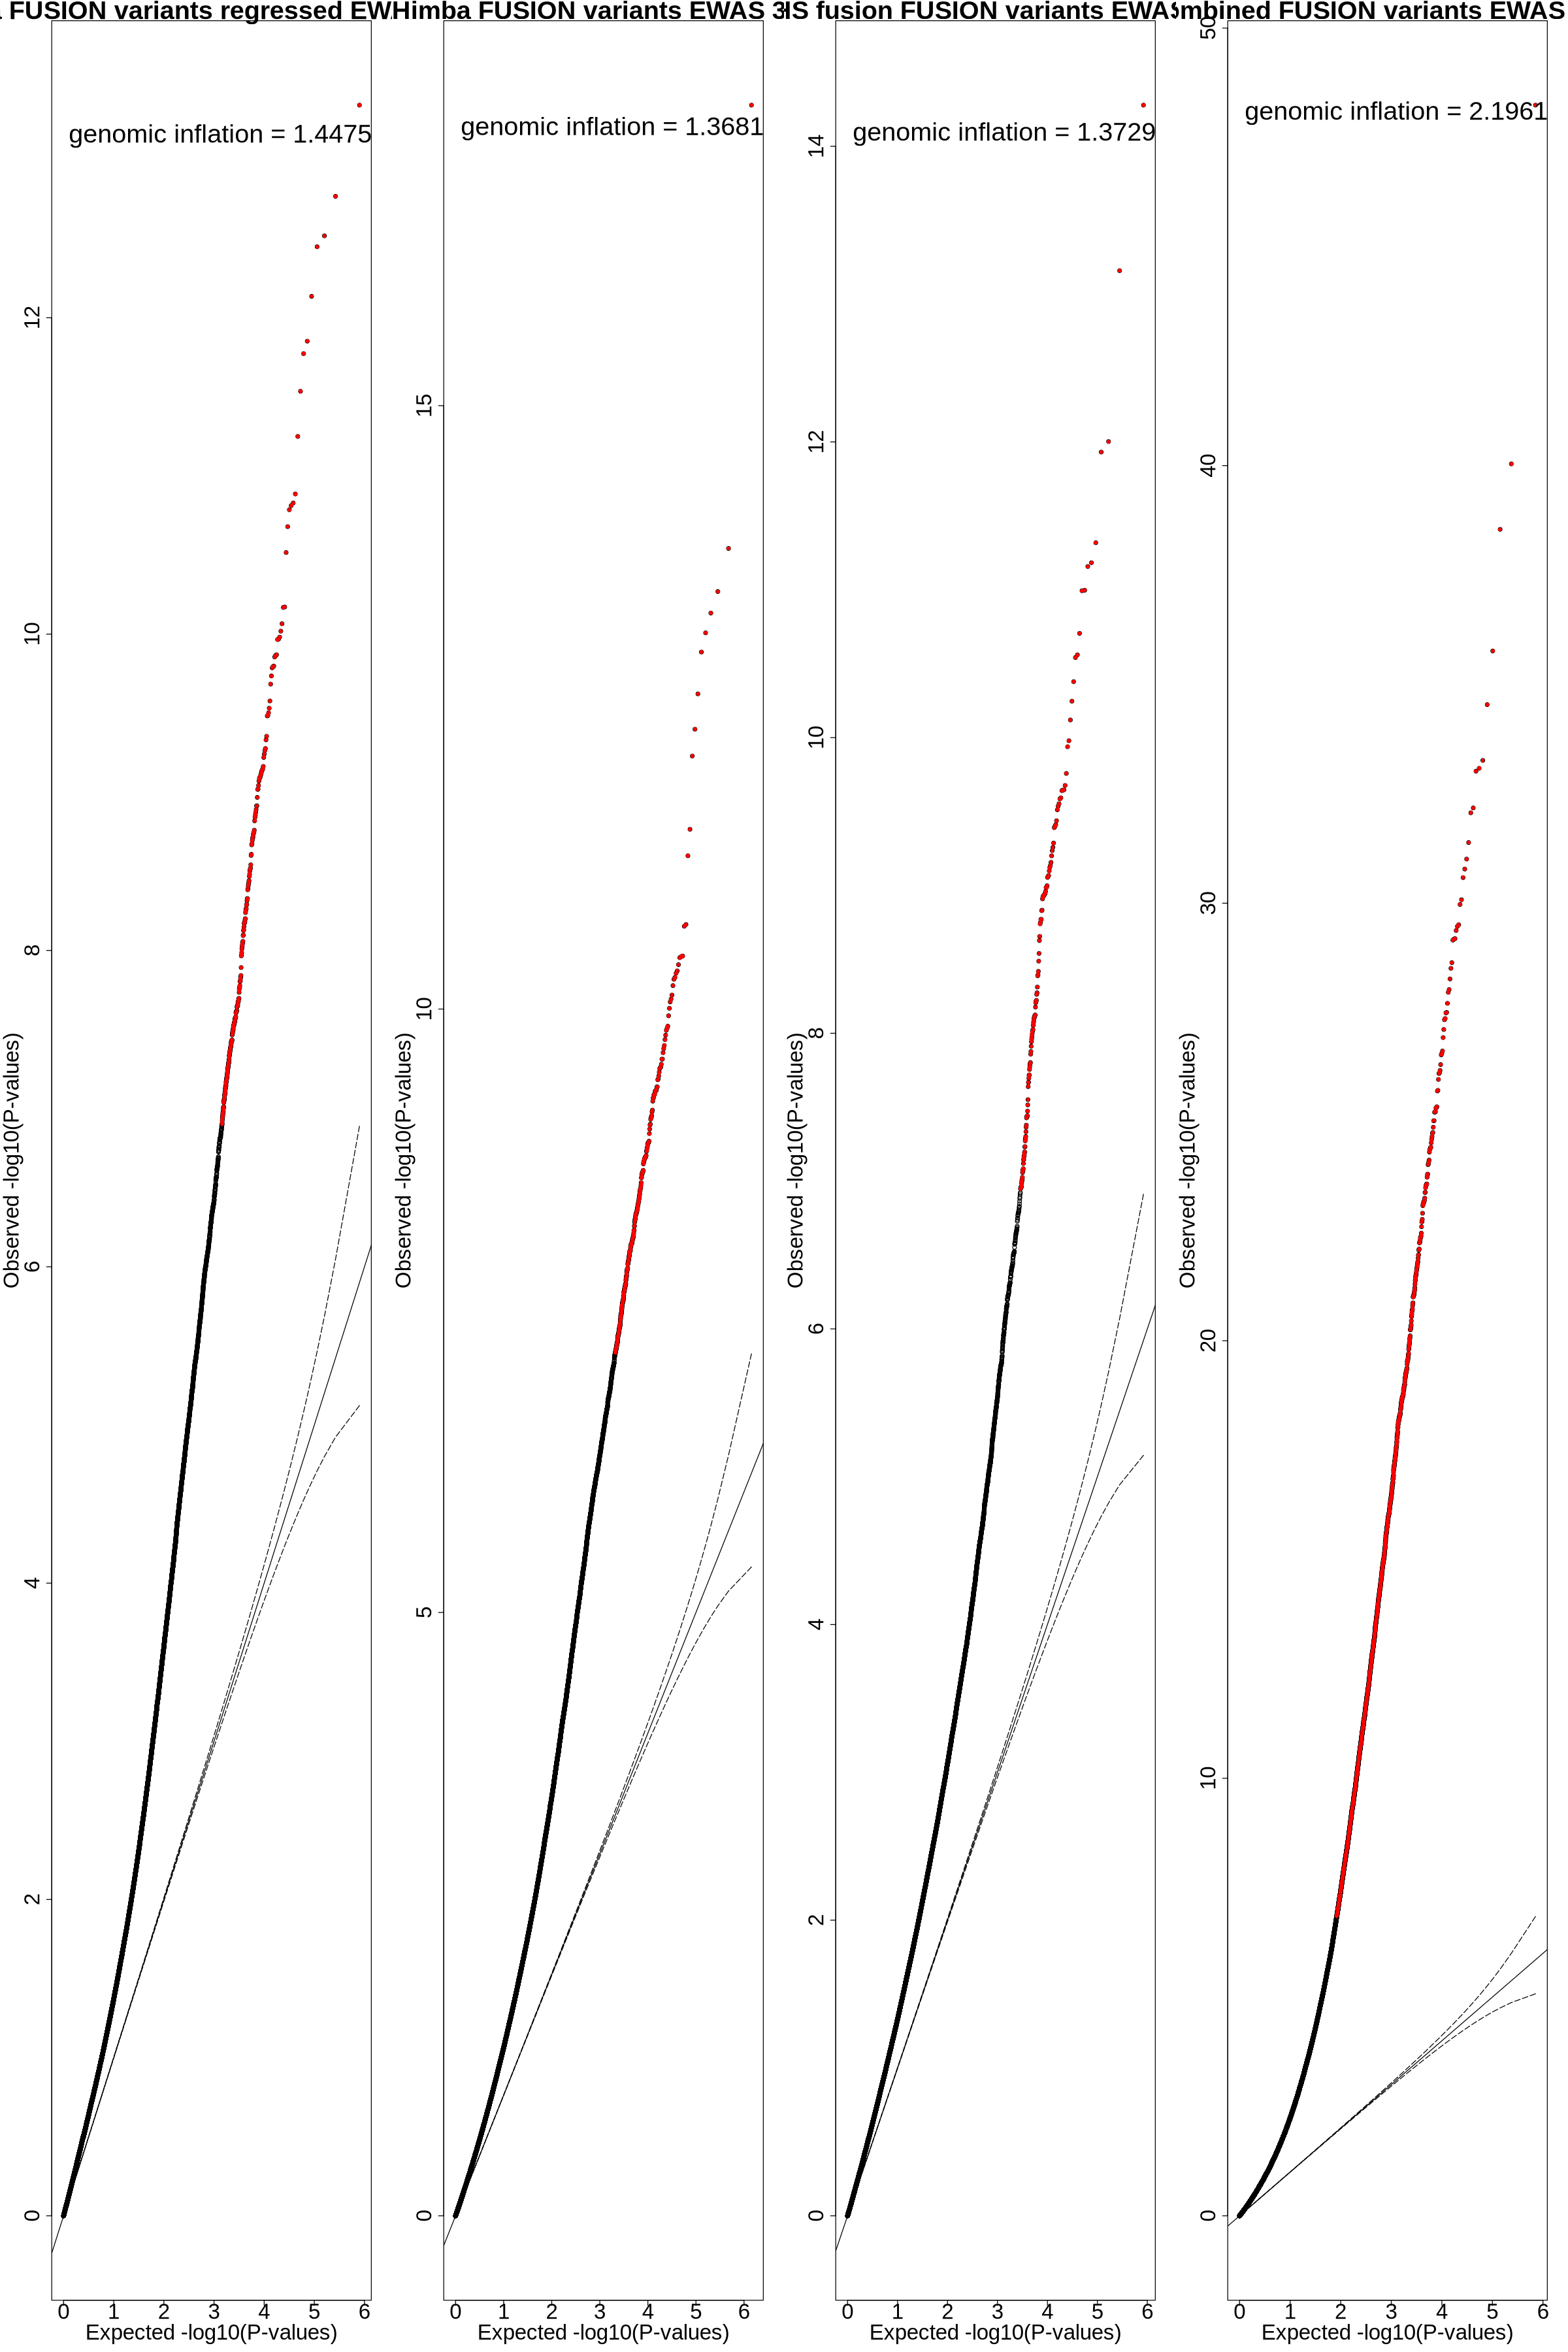

In [6]:
all_emmax_fusion_regress <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/all_covs_fusion_regressed.ps", header=FALSE)
colnames(all_emmax_fusion_regress)<-c("CPG.Labels","V2","P.value")

all_emmax_fusion_regress$CPG.Labels <- as.character(all_emmax_fusion_regress$CPG.Labels)
all_fusion_reg_sig <- sig_sites(all_emmax_fusion_regress)

Baka_best_covs_reg <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/Baka_sex_methPC23_Neutro_genoPC12345_fusion_regressed.ps", header=FALSE)

KHS_best_covs_reg <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/KHS_sex_batch_PC13_meth_Neutro_genoPCs_fusion_regressed.ps", header=FALSE)

Himba_best_covs_reg <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/Himba_sex_cpPCs_Neutro_genoPCs_fusion_regressed.ps", header=FALSE)


KHS_best_covs_reg$V1 <- as.character(KHS_best_covs_reg$V1)
Baka_best_covs_reg$V1 <- as.character(Baka_best_covs_reg$V1)
Himba_best_covs_reg$V1 <- as.character(Himba_best_covs_reg$V1)

colnames(Baka_best_covs_reg)<-c("CPG.Labels","V2","P.value")
colnames(KHS_best_covs_reg)<-c("CPG.Labels","V2","P.value")
colnames(Himba_best_covs_reg)<-c("CPG.Labels","V2","P.value")

Himba_best_covs_reg$CPG.Labels <- as.character(Himba_best_covs_reg$CPG.Labels)
KHS_best_covs_reg$CPG.Labels <- as.character(KHS_best_covs_reg$CPG.Labels)
Baka_best_covs_reg$CPG.Labels <- as.character(Baka_best_covs_reg$CPG.Labels)


Himba_sig_reg <- sig_sites(Himba_best_covs_reg)
KHS_sig_reg <- sig_sites(KHS_best_covs_reg)
Baka_sig_reg <- sig_sites(Baka_best_covs_reg)

par(mfrow = c(1, 4), mar = c(5, 5, 2, 2))
qq.plot(Baka_best_covs_reg$P.value, main = paste('Baka FUSION variants regressed EWAS ',  nrow(Baka_sig_reg))) 
qq.plot(Himba_best_covs_reg$P.value, main = paste('Himba FUSION variants EWAS',  nrow(Himba_sig_reg))) 
qq.plot(KHS_best_covs_reg$P.value, main = paste('KHS fusion FUSION variants EWAS',  nrow(KHS_sig_reg))) 
qq.plot(all_emmax_fusion_regress$P.value, main = paste('Combined FUSION variants EWAS',  nrow(all_fusion_reg_sig))) 


In [7]:
##Manhattan plots for population-specific 


load("/share/hennlab/vault/people/shyamie/methylation/results/methylation_age.RData")
options(repr.plot.width = 25, repr.plot.height = 10)
par(mfrow = c(1,1))
testinfo <- meta_gen[,c(1,3,4)]
site.info <- probe.info[probe.info$TargetID %in% testinfo$CPG.Labels,]

manhattan.plot <- function(testinfo, siteinfo, sigtype="Bonferroni", chr.col.pick=1:24, label.sig=F, main.title="Methylation plot") {
  colnames(testinfo) <- c("label", "sig_pvalue", "het_pvalue")
  sorted <- match(siteinfo$TargetID, testinfo$label)
  
  # Define the variables
  chr <- siteinfo$CHR
  chr[chr=="X"] <- 23
  chr[chr=="Y"] <- 24
  genomepos <- siteinfo$MAPINFO
  score <- -log10(testinfo$sig_pvalue[sorted])
  het_score <- -log10(testinfo$het_pvalue[sorted])
  chr.unique <- unique(chr)
  
  # Convert map info to a 'genome position' that is continuous so that it can be plotted
  if (length(chr.unique) > 1) {
    for (i in chr.unique[2:length(chr.unique)]) {
      genomepos[which(chr==i)] <- genomepos[which(chr==i)] +
                                  max(genomepos[which(chr==chr.unique[which(chr.unique==i)-1])]) + 100
    }
  }
  
  # Significance type
  if (sigtype == "Bonferroni") {
    sig.cutoff <- 0.05 / nrow(testinfo)
    sig_het.cutoff <- .05 / nrow(sig)
    sig <- which(testinfo$sig_pvalue[sorted] <= sig.cutoff)
    sig_het <- which(testinfo$het_pvalue[sorted] <= sig_het.cutoff & testinfo$sig_pvalue[sorted] <= sig.cutoff)}
  
  # Graphics
  x.lab <- chr.unique
  chr.colours <- c("#8c0025", "#a653a0", "#000059", "#00ccff", "#149900", "#1d6273",
                   "#285916", "#ffcc00", "#a64200", "#ff0066", "#660099", "#0088ff",
                   "#005947", "#8da629", "#8c5e00", "#ff9180", "#ff00aa", "#a280ff",
                   "#13324d", "#00a66f", "#ff0000", "#660044", "#686080", "#eeff00")
  
  if (length(chr.unique) < length(chr.col.pick)) {
    chr.col.pick <- 1:(length(chr.unique))
  } else if (length(chr.unique) > length(chr.col.pick)) {
    n.reps <- as.integer(length(chr.unique) / length(chr.col.pick))
    n.remain <- as.integer(length(chr.unique) %% length(chr.col.pick))
    if (n.remain == 0) {
      chr.col.pick <- rep(chr.col.pick, n.reps)
    } else {
      chr.col.pick <- c(rep(chr.col.pick, n.reps), chr.col.pick[1:n.remain])
    }
  }
  
  point.cols <- c()
  for (i in chr.unique) {
    point.cols[which(siteinfo$CHR==i)] <- chr.colours[chr.col.pick[i]]
  }
  
  # Determine plot location of chromosome number labels
  chr.lab.loc <- c()
  for (i in chr.unique) {
    chr.range <- range(genomepos[which(probe.info$CHR==i)])
    chr.lab.loc[i] <- (chr.range[2] - chr.range[1]) / 2 + chr.range[1]
  }
  chr.lab.loc <- as.numeric(na.omit(chr.lab.loc))
  
  # Make the Manhattan plot
  plot(range(genomepos), c(0, max(score, het_score, na.rm=T) + 0.05), type="n", xaxt="n", main=main.title,
       xlab="Chromosome", ylab=expression(paste("Observed -log", scriptstyle(10), "(p-values)", sep="")))
  
  # Plot significant points for both sig and sig_het
  #points(genomepos[sig], score[sig], col=point.cols[sig], pch=16, cex=0.6)
  points(genomepos[sig_het], score[sig_het], col=point.cols[sig_het], pch=8, cex=1.5)
  points(genomepos, score, col=point.cols, pch=16, cex=0.2)
  
  # Add significance cutoff lines
  abline(-log10(sig.cutoff), 0, lty=2)
  #abline(-log10(sig_het.cutoff), 0, lty=2)
  
  # Add chromosome labels
  axis(1, at=chr.lab.loc, labels=chr.unique, tick=F, cex.axis=0.85)
  
  # Optionally label significant points
  if (label.sig) {
    text(genomepos[which(testinfo$sig_pvalue <= sig.cutoff)] + (range(genomepos)[2] - range(genomepos)[1]) * 0.025,
         score[which(testinfo$sig_pvalue <= sig.cutoff)], testinfo$label[which(testinfo$sig_pvalue <= sig.cutoff)], cex=0.6)
  }
}



In [8]:

load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/metagen_all3_no_meqtl_regress.RData")
par(mfrow = c(1,1))
testinfo <- meta_gen[,c(1,3,4)]
site.info <- probe.info[probe.info$TargetID %in% testinfo$CPG.Labels,]
manhattan.plot(testinfo, probe.info) 


ERROR: Error in manhattan.plot(testinfo, probe.info): object 'sig' not found
